In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, Sequential
from tensorflow.keras import layers

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_train = x_train.reshape((-1, 28,28,1))/255
x_test = x_test.reshape((-1, 28,28,1))/255

In [ ]:
# model = models.Sequential()
# #model.add(layers.Conv2D(필터갯수, 필터크기, 보폭 activation='relu', input_shape=(너비, 높이, 채널)))
# model.add(layers.Conv2D(32, (3, 3), strides=(1,1), activation='relu', input_shape=(28, 28, 1), padding='same'))
# #model.add(layers.MaxPooling2D(pool_size, 보폭, padding='valid'))
# model.add(layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
Conv2d_01 = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
MaxPooling2D_01 = layers.MaxPooling2D((2, 2))(Conv2d_01)
Conv2d_02 = layers.Conv2D(64, (3, 3), activation='relu')(MaxPooling2D_01)
MaxPooling2D_02 = layers.MaxPooling2D((2, 2))(Conv2d_02)
Conv2d_03 = layers.Conv2D(64, (3, 3), activation='relu')(MaxPooling2D_02)

flat = layers.Flatten()(Conv2d_03)
Dense_01 = layers.Dense(64, activation='relu')(flat)
Dense_02 = layers.Dense(10, activation='softmax')(Dense_01)
model = models.Model(inputs = inputs, outputs = Dense_02)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928 

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

modelpath ="/content/drive/MyDrive/Datasets/{epoch:02d}-{val_accuracy:4f}.hdf5"
checkpointer = keras.callbacks.ModelCheckpoint(filepath=modelpath, verbose=1)

history = model.fit(x_train, y_train, epochs = 15, validation_split=0.2, batch_size=256, verbose=1, callbacks=[checkpointer])

Epoch 1/15
188/188 [==============================] - ETA: 0s - loss: 0.4270 - accuracy: 0.8760
Epoch 1: saving model to /content/drive/MyDrive/Datasets/01-0.959583.hdf5
188/188 [==============================] - 3s 10ms/step - loss: 0.4270 - accuracy: 0.8760 - val_loss: 0.1339 - val_accuracy: 0.9596
Epoch 2/15
181/188 [===========================>..] - ETA: 0s - loss: 0.0943 - accuracy: 0.9713
Epoch 2: saving model to /content/drive/MyDrive/Datasets/02-0.978500.hdf5
188/188 [==============================] - 2s 9ms/step - loss: 0.0938 - accuracy: 0.9716 - val_loss: 0.0765 - val_accuracy: 0.9785
Epoch 3/15
187/188 [============================>.] - ETA: 0s - loss: 0.0654 - accuracy: 0.9798
Epoch 3: saving model to /content/drive/MyDrive/Datasets/03-0.978083.hdf5
188/188 [==============================] - 2s 9ms/step - loss: 0.0654 - accuracy: 0.9798 - val_loss: 0.0710 - val_accuracy: 0.9781
Epoch 4/15
188/188 [==============================] - ETA: 0s - loss: 0.0488 - accuracy: 0.9855


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


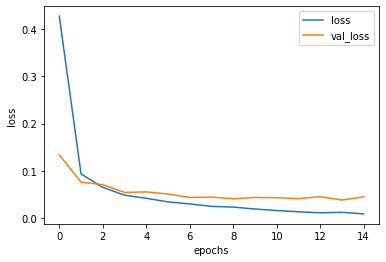

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = history.history['loss']
y1 = history.history['val_loss']

x = np.arange(len(y))

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='loss')
plt.plot(x, y1, label='val_loss')

plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0328 - accuracy: 0.9902


[0.032845064997673035, 0.9901999831199646]